In [7]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [8]:
num_products = 1000
true_alpha = 7
true_beta = 3
true_qualities = scipy.stats.beta.rvs(true_alpha,true_beta,size=num_products)
num_ratings = scipy.stats.poisson.rvs([num_products/k for k in range(1,num_products+1)])
num_likes = scipy.stats.binom.rvs(num_ratings, true_qualities)
df = pd.DataFrame({'true_quality':true_qualities, 'num_ratings':num_ratings, 'num_likes':num_likes})
df = df[df['num_ratings']>0]
x_range = np.arange(.0005,1.0005, .001)

In [9]:
def get_posterior(prior, df, x_range):
    likelihoods = scipy.stats.binom.pmf(df['num_likes'], df['num_ratings'], x_range.reshape(len(x_range),1))
    unnormalized_prob_dists = likelihoods * prior
    prob_dists = unnormalized_prob_dists/unnormalized_prob_dists.sum(axis=0)*len(x_range)
    posterior = prob_dists.mean(axis=1).reshape(-1,1)
    return posterior

def test_posterior(posterior, test_df, x_range):
    likelihoods = scipy.stats.binom.pmf(test_df['num_likes'], test_df['num_ratings'], x_range.reshape(len(x_range),1))
    # prob_dists = likelihoods/likelihoods.sum(axis=0)*len(x_range)
    nll = -np.log((posterior*likelihoods).sum(axis=0)*len(x_range)).sum()
    return nll

def get_predictions(prior, df, x_range):
    likelihoods = scipy.stats.binom.pmf(df['num_likes'], df['num_ratings'], x_range.reshape(len(x_range),1))
    unnormalized_prob_dists = likelihoods * prior
    prob_dists = unnormalized_prob_dists/unnormalized_prob_dists.sum(axis=0)*len(x_range)
    return x_range.dot(prob_dists)/len(x_range)

In [10]:
def binary_dkl(q,p):
    selfent = -p*np.log(p) -(1-p)*np.log(1-p)
    crossent = -p*np.log(q) -(1-p)*np.log(1-q)
    dkl = crossent-selfent
    return dkl

In [ ]:
df = pd.DataFrame(data)[['title', 'view_count', 'like_count', 'dislike_count']]
df['num_ratings'] = df['like_count'] + df['dislike_count']
df['empirical_quality'] = df['like_count']/df['num_ratings']
# df['num_ratings'] = df['view_count']
df['num_likes'] = df['like_count']
df = df[df['num_ratings']>0]
df

mean nll:0.0
mean nll:0.0
mean nll:0.0
mean nll:0.0
mean nll:0.0
mean nll:0.0
mean nll:0.0
mean nll:0.0
mean nll:0.0
mean nll:0.0
mean nll:0.0
mean nll:0.0


KeyboardInterrupt: 

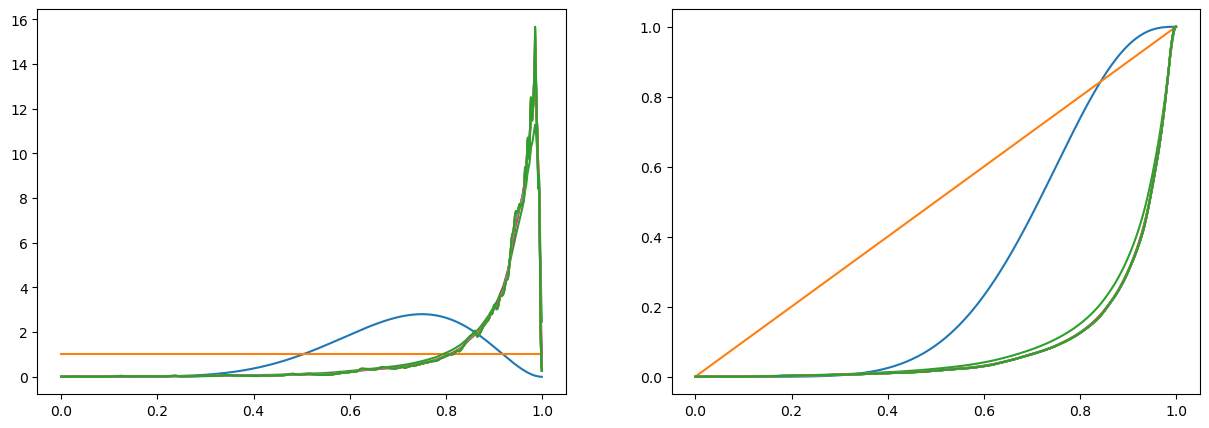

In [48]:
crossval = False
prior = np.ones((len(x_range),1))
# prior = scipy.stats.beta.pdf(x_range,true_alpha, true_beta).reshape((-1,1))
best_nll = float('inf')
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range, scipy.stats.beta.pdf(x_range,true_alpha, true_beta))
plt.plot(x_range, prior)
plt.subplot(122)
plt.plot(x_range, scipy.stats.beta.cdf(x_range, true_alpha, true_beta))
plt.plot(x_range, np.cumsum(prior)/len(x_range))
losses = []
irreducible_losses = []
for i in range(2000):
    df['prediction'] = get_predictions(prior, df, x_range)
    # df['ideal_prediction'] = get_predictions(scipy.stats.beta.pdf(x_range,true_alpha, true_beta).reshape((-1,1)), df, x_range)
    # df['loss'] = binary_dkl(df['prediction'], df['true_quality'])
    # df['irreducible_loss'] = binary_dkl(df['prediction'], df['ideal_prediction'])
    # losses.append(df['loss'].mean())
    # irreducible_losses.append(df["irreducible_loss"].mean())
    # # print(f'loss: {df["loss"].mean()}')
    # print(f'irreducible loss: {df["irreducible_loss"].mean()}')
    nll = 0
    if crossval:
        kf = KFold(n_splits = 2)
        for i, (train_index, test_index) in enumerate(kf.split(df)):
            posterior = get_posterior(prior, df.iloc[train_index], x_range)
            nll += test_posterior(posterior, df.iloc[test_index], x_range)
    if nll <= best_nll:
        print(f'mean nll:{nll/len(df)}')
        best_nll = nll
        prior = get_posterior(prior, df, x_range)
        plt.subplot(121)
        plt.plot(x_range, prior)
        plt.subplot(122)
        plt.plot(x_range, np.cumsum(prior)/len(x_range))
    else:
        break
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range, prior)
plt.plot(x_range, scipy.stats.beta.pdf(x_range,true_alpha, true_beta))
plt.subplot(122)
plt.plot(x_range, np.cumsum(prior)/len(x_range))
plt.plot(x_range, scipy.stats.beta.cdf(x_range, true_alpha, true_beta))
plt.show()


In [50]:
df.sort_values(by='prediction', ascending=False)[:10]['prediction'].mean()

0.9980805335569674

In [58]:
df[df['num_ratings']>100].sort_values(by='empirical_quality', ascending=False)[:10]['prediction'].mean()

0.9898274396093244

In [60]:
df[df['prediction']>.989827].sort_values(by='empirical_quality', ascending=False)

,title,view_count,like_count,dislike_count,num_ratings,empirical_quality,num_likes,prediction
12761,Kurt Cobain 1993 Interview (RARE),24067,739,0,739,1.000000,739,0.996585
13368,Dean & Elena | Landfill (Part 2),25721,815,0,815,1.000000,815,0.996909
18586,Set It Off - Hush hush | Lyrics Eng-Esp,13971,414,0,414,1.000000,414,0.994489
19385,azusa - Kimi no Mama de (君のままで),12592,174,0,174,1.000000,174,0.990151
17397,Embracing Happiness,14990,170,0,170,1.000000,170,0.990009
...,...,...,...,...,...,...,...,...
4296,"OMG ""TYLE"" zabrakło do DRAFTU 194! | FIFA 18",82758,5387,53,5440,0.990257,5387,0.989916
1287,WHAT IF RADITZ TURNED GOOD? PART 6 | A Dragon ...,344788,11174,110,11284,0.990252,11174,0.990084
319,Ini Mengerikan - Infliction Indonesia - Part 3,369031,13969,138,14107,0.990218,13969,0.990083
1003,REX 2501 - ROLÊ DE MT-09 REMAPEADA | TESTANDO ...,320883,14440,146,14586,0.989990,14440,0.989862


In [59]:
df[df['num_ratings']>100]

,title,view_count,like_count,dislike_count,num_ratings,empirical_quality,num_likes,prediction
0,trentemoller - kink,313176,874,19,893,0.978723,874,0.978122
1,TEST! Słuchawka do telefonu! O.o ♥ G+ #17,312849,18182,554,18736,0.970431,18182,0.970389
2,Abaddon Pinapangarap ko ft. Curse 0ne,312448,222,21,243,0.913580,222,0.915361
3,Sergej Cetkovic - Nije istina,312329,493,8,501,0.984032,493,0.982346
4,Sandra Resic - Donesi divlje mirise - HH - (TV...,323505,1589,118,1707,0.930873,1589,0.931443
...,...,...,...,...,...,...,...,...
19994,UNIVERSITA' E ESPORTS - COME PUOI AIUTARE PER ...,12194,780,7,787,0.991105,780,0.989136
19995,Ex esposa de Eugenio Chicas declara como fue l...,21563,813,27,840,0.967857,813,0.967514
19996,Billz Raw - 1Hunnit,12215,115,2,117,0.982906,115,0.976651
19998,Путин о встречи с Трампом: Это были УСПЕШНЫЕ П...,12164,117,6,123,0.951220,117,0.950481


In [ ]:
df.sort_values(by='irreducible_loss', ascending=False)

,true_quality,num_ratings,num_likes,prediction,ideal_prediction,loss,irreducible_loss
8,0.283443,2,0,0.748777,0.583333,4.756909e-01,6.516255e-02
9,0.565693,5,2,0.748589,0.600000,7.894726e-02,5.299419e-02
3,0.718354,6,3,0.748779,0.625000,2.398881e-03,3.728999e-02
28,0.655510,1,0,0.749348,0.636364,2.184686e-02,3.130192e-02
20,0.670152,1,0,0.749348,0.636364,1.570991e-02,3.130192e-02
29,0.539561,2,1,0.749539,0.666667,1.029956e-01,1.716772e-02
11,0.562398,2,1,0.749539,0.666667,8.263624e-02,1.716772e-02
2,0.638428,9,6,0.749349,0.684211,3.020643e-02,1.073038e-02
12,0.436039,6,4,0.749539,0.687500,2.215431e-01,9.758989e-03
27,0.549729,3,2,0.749730,0.692308,9.387364e-02,8.391908e-03


In [34]:
data[16919]

{'v': 3,
 'id': 'z1xsTd18dv8',
 'fetch_date': '20190203024148',
 'duration': 0,
 'age_limit': 0,
 'view_count': 0,
 'like_count': 0,
 'dislike_count': 0,
 'average_rating': 0,
 'allow_embed': False,
 'is_crawlable': True,
 'allow_sub_contrib': False,
 'is_live_content': False,
 'is_ads_enabled': False,
 'is_comments_enabled': True,
 'unavailable_message': 'This video is unavailable.'}

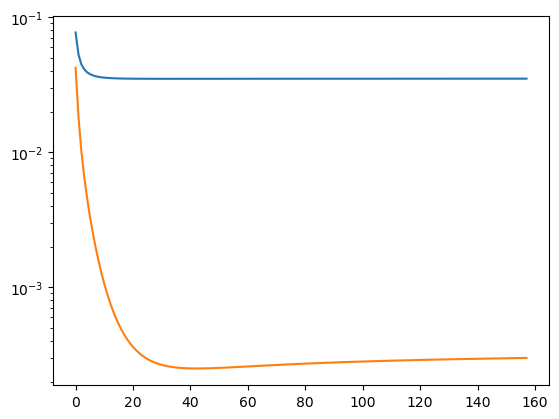

In [ ]:
plt.plot(losses)
plt.plot(irreducible_losses)
plt.yscale('log')

In [ ]:
len(losses)

158

In [ ]:
df['loss']

0      0.000027
1      0.003406
2      0.005695
3      0.000012
4      0.001322
         ...   
993    0.133158
994    0.021706
995    0.023594
996    0.036509
997    0.070334
Name: loss, Length: 845, dtype: float64

In [ ]:
(df['prediction']-df['ideal_prediction']).sort_values()

150   -0.260416
254   -0.136944
698   -0.053877
382   -0.027119
591   -0.027119
         ...   
115    0.003901
65     0.004066
54     0.004189
46     0.004189
32     0.004227
Length: 845, dtype: float64

In [ ]:
x_range.dot(prior)

array([695.59601476])

In [ ]:
(df['true_quality']*np.log(df['prediction']/df['true_quality']) + (1-df['true_quality'])*(1-np.log((1-df['prediction'])/(1-df['true_quality']))))

0      0.277924
1      0.181912
2      0.401571
3      0.107664
4      0.483031
         ...   
993   -0.266547
994    0.082352
995    0.010389
996   -0.056175
997   -0.151845
Length: 845, dtype: float64

In [12]:
import json

In [20]:
data = []
for i in range(1, 11):
    f = open(f'0000/{5000*i}.json')
    data+=json.load(f)

In [ ]:
np.log2(1/np.exp(-df['irreducible_loss'])).mean()

0.0003415764980901688